# –î–æ–º–∞—à–Ω—è—è —Ä–∞–±–æ—Ç–∞ 

–í —ç—Ç–æ–π —Ä–∞–±–æ—Ç—ã –º—ã –±—É–¥–µ–º —É—á–∏—Ç—å—Å—è –ø—Ä–µ–¥—Å–∫–∞–∑—ã–≤–∞—Ç—å –∑–∞—Ä–ø–ª–∞—Ç—É data scientist-–æ–≤ –≤ –∑–∞–≤–∏—Å–∏–º–æ—á—Ç–∏ –æ—Ç —Ä—è–¥–∞ —Ñ–∞–∫—Ç–æ—Ä–æ–≤ —Å –ø–æ–º–æ—â—å—é –≥—Ä–∞–¥–∏–µ–Ω—Ç–æ–Ω–æ–≥–æ –±—É—Å—Ç–∏–Ω–≥–∞

–¶–µ–ª—å –¥–æ–º–∞—à–Ω–µ–π —Ä–∞–±–æ—Ç—ã –Ω–∞—É—á–∏—Ç—å—Å—è –ø—Ä–µ–¥—Å–∫–∞–∑—ã–≤–∞—Ç—å –∑–∞—Ä–ø–ª–∞—Ç—ã (salary_in_usd) –ø–æ —Ä—è–¥—ã —Ñ–∞–∫—Ç–æ—Ä–æ–≤ 

work_year: The number of years of work experience in the field of data science.

experience_level: The level of experience, such as Junior, Senior, or Lead.

employment_type: The type of employment, such as Full-time or Contract.

job_title: The specific job title or role, such as Data Analyst or Data Scientist.

salary: The salary amount for the given job.

salary_currency: The currency in which the salary is denoted.

salary_in_usd: The equivalent salary amount converted to US dollars (USD) for comparison purposes.

employee_residence: The country or region where the employee resides.

remote_ratio: The percentage of remote work offered in the job.

company_location: The location of the company or organization.

company_size: The company‚Äôs size is categorized as Small, Medium, or Large.

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn. preprocessing import OneHotEncoder
from sklearn. preprocessing import LabelEncoder
from sklearn.preprocessing import TargetEncoder
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

import catboost
from catboost import CatBoostRegressor

import xgboost
from xgboost.sklearn import XGBRegressor

import lightgbm as lgb
from lightgbm.sklearn import LGBMRegressor

import shap

In [2]:
df = pd.read_csv("ds_salaries.csv")

In [3]:
df.head()

work_year experience_level employment_type                 job_title  \
0       2023               SE              FT  Principal Data Scientist   
1       2023               MI              CT               ML Engineer   
2       2023               MI              CT               ML Engineer   
3       2023               SE              FT            Data Scientist   
4       2023               SE              FT            Data Scientist   

   salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0   80000             EUR          85847                 ES           100   
1   30000             USD          30000                 US           100   
2   25500             USD          25500                 US           100   
3  175000             USD         175000                 CA           100   
4  120000             USD         120000                 CA           100   

  company_location company_size  
0               ES            L  
1               US            S  
2               US            S  
3               CA            M  
4               CA            M

## –ó–∞–¥–∞–Ω–∏–µ 1 (0.2 –±–∞–ª–ª–∞)

–†–∞–∑–¥–µ–ª–∏—Ç–µ –≤—ã–±–æ—Ä–∫—É –Ω–∞ train, val, test (80%, 10%, 10%) –≤ –∫–∞—á–µ—Å—Ç–≤–µ —Ç–∞—Ä–≥–µ—Ç–∞ –≤—ã–±–µ—Ä–∏—Ç–µ salary_in_usd, —É–¥–∞–ª–∏—Ç–µ –∏–∑ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ (salary) —á—Ç–æ–±—ã –∏–∑–±–µ–∂–∞—Ç—å –ª–∏–∫–∞ –≤ –¥–∞–Ω–Ω—ã—Ö.

In [4]:
y = df["salary_in_usd"]
X = df.drop(["salary_in_usd", "salary"], axis=1)
X, X_test, y, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.12, random_state=42)

In [5]:
print(np.array([X_train.size, X_val.size, X_test.size])/np.sum(np.array([X_train.size, X_val.size, X_test.size])))

[0.79174434 0.1081225  0.10013316]


## –ó–∞–¥–∞–Ω–∏–µ 2 (0.3 –±–∞–ª–ª–∞)

–û–±—É—á–∏—Ç–µ –º–æ–¥–µ–ª—å –ª–∏–Ω–µ–π–Ω–æ–π —Ä–µ–≥—Ä–µ—Å–∏–∏ –∏ –æ—Ü–µ–Ω–∏—Ç–µ –µ—ë –∫–∞—á–µ—Å—Ç–≤–æ —á–µ—Ä–µ–∑ mape –∏ rmse

In [6]:
cat = ["experience_level", "employment_type", "job_title", "salary_currency", "employee_residence", 
                        "company_location", "company_size"]
ohe = OneHotEncoder(handle_unknown='ignore')
feat = pd.DataFrame(ohe.fit_transform(X[cat]).toarray(), columns=ohe.get_feature_names_out())
X_ohe = X.copy()
X_ohe = X_ohe.drop(cat, axis=1)
X_ohe.reset_index(drop=True, inplace=True)
feat.reset_index(drop=True, inplace=True)
X_ohe = pd.concat([X_ohe, feat], axis=1)
feat = pd.DataFrame(ohe.transform(X_test[cat]).toarray(), columns=ohe.get_feature_names_out())
X0 = X_test.drop(cat, axis=1)
X0.reset_index(drop=True, inplace=True)
feat.reset_index(drop=True, inplace=True)
X_test_ohe = pd.concat([X0, feat], axis=1)

In [7]:
cat = ["experience_level", "employment_type", "job_title", "salary_currency", "employee_residence", 
                        "company_location", "company_size"]
le = LabelEncoder()
X_le = X.copy()
X_test_le = X_test.copy()
for i in cat:
     X_le[i] = le.fit_transform(X[i])
     X_test_le[i] = le.fit_transform(X_test[i])

In [8]:
cat = ["experience_level", "employment_type", "job_title", "salary_currency", "employee_residence", 
                        "company_location", "company_size"]
te = TargetEncoder()
X_te= pd.DataFrame(te.fit_transform(X, y), columns=te.get_feature_names_out())
X_test_te= pd.DataFrame(te.transform(X_test), columns=te.get_feature_names_out())

C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


In [9]:
lr = LinearRegression()
lr.fit(X_le, y)
y_pred = lr.predict(X_test_le)
print(f"MAPE: {round(mean_absolute_percentage_error(y_test, y_pred), 2)}, RMSE: {round(mean_squared_error(y_test, y_pred)**0.5, 2)}")

MAPE: 0.66, RMSE: 106200.39


## –ó–∞–¥–∞–Ω–∏–µ 3 (0.3 –±–∞–ª–ª–∞)

–û–±—É—á–∏—Ç–µ –º–æ–¥–µ–ª—å –±—É—Å—Ç–∏–Ω–≥–∞ –≤—ã–±–µ—Ä–∏—Ç–µ –ª—é–±—É—é –∏–∑ —Ç—Ä–µ—Ö –±–∏–±–ª–∏–æ—Ç–µ–∫ catboost, xgboost, lightgbm –∏ –æ—Ü–µ–Ω–∏—Ç–µ –µ—ë –∫–∞—á–µ—Å—Ç–≤–æ —á–µ—Ä–µ–∑ mape –∏ rmse

In [10]:
xgb = XGBRegressor(objective='reg:tweedie', random_state=42)
xgb.fit(X_ohe, y)
y_pred = xgb.predict(X_test_ohe)
print(f"MAPE: {round(mean_absolute_percentage_error(y_test, y_pred), 2)}, RMSE: {round(mean_squared_error(y_test, y_pred)**0.5, 2)}")

MAPE: 0.38, RMSE: 49318.38


In [11]:
d = dict()
d["xgb"] = []
d["gbm"] = []
d["cat"] = []

In [12]:
d["xgb"].append((round(mean_absolute_percentage_error(y_test, y_pred), 2), round(mean_squared_error(y_test, y_pred)**0.5, 2)))

–ª—É—á—à–µ, —á–µ–º –ª–∏–Ω–µ–π–Ω–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è, –Ω–æ –æ—à–∏–±–∫–∞ –≤—Å–µ —Ä–∞–≤–Ω–æ –±–æ–ª—å—à–∞—è

## –ó–∞–¥–∞–Ω–∏–µ 4 (0.6 –±–∞–ª–ª–∞)

–î–∞–ª–µ–µ –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∞–π—Ç–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ —Å –ø–æ–º–æ—â—å—é onehot –∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏—è, labelencoder –∏ —Å—á–µ—Ç—á–∏–∫–æ–≤ (mean target encoding) —Å—Ä–∞–≤–Ω–∏—Ç–µ –∫–∞—á–µ—Å—Ç–≤–æ —Ç—Ä—ë—Ö –º–æ–¥–µ–ª–µ–π –±—É—Å—Ç–∏–Ω–≥–∞ (catboost, xgb, lgbm) —Å –ø–æ–º–æ—â—å—é mape –∏ rmse. –ö–∞–∫–∏–µ –≤—ã–≤–æ–¥—ã –º–æ–∂–Ω–æ —Å–¥–µ–ª–∞—Ç—å? –í—ã–±–µ—Ä–∏—Ç–µ –¥–ª—è –∫–∞–∂–¥–æ–π –∏–∑ –º–æ–¥–µ–ª–µ–π –ª—É—á—à–µ–µ –∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ - –≤ –¥–∞–ª—å–Ω–µ–π—à–µ–º –±—É–¥–µ–º —Ä–∞–±–æ—Ç–∞—Ç—å —Ç–æ–ª—å–∫–æ —Å –Ω–∏–º.

In [13]:
gbm = lgb.LGBMRegressor(objective="poisson", verbose=0, random_state=42)
gbm.fit(X_ohe, y)
y_pred = gbm.predict(X_test_ohe)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines


In [14]:
d["gbm"].append((round(mean_absolute_percentage_error(y_test, y_pred), 2), round(mean_squared_error(y_test, y_pred)**0.5, 2)))

In [15]:
cat = CatBoostRegressor(loss_function='Tweedie:variance_power=1.9', random_state=42)
cat.fit(X_ohe, y, verbose=False)
y_pred = cat.predict(X_test_ohe)

In [16]:
d["cat"].append((round(mean_absolute_percentage_error(y_test, y_pred), 2), round(mean_squared_error(y_test, y_pred)**0.5, 2)))

In [17]:
xgb = XGBRegressor(objective='reg:tweedie', random_state=42)
xgb.fit(X_le, y)
y_pred = xgb.predict(X_test_le)

In [18]:
d["xgb"].append((round(mean_absolute_percentage_error(y_test, y_pred), 2), round(mean_squared_error(y_test, y_pred)**0.5, 2)))

In [19]:
gbm = lgb.LGBMRegressor(objective="poisson", verbose=0, random_state=42)
gbm.fit(X_le, y)
y_pred = gbm.predict(X_test_le)

In [20]:
d["gbm"].append((round(mean_absolute_percentage_error(y_test, y_pred), 2), round(mean_squared_error(y_test, y_pred)**0.5, 2)))

In [21]:
cat = CatBoostRegressor(loss_function='Tweedie:variance_power=1.9', random_state=42)
cat.fit(X_le, y, verbose=False)
y_pred = cat.predict(X_test_le)

In [22]:
d["cat"].append((round(mean_absolute_percentage_error(y_test, y_pred), 2), round(mean_squared_error(y_test, y_pred)**0.5, 2)))

In [23]:
xgb = XGBRegressor(objective='reg:tweedie', random_state=42)
xgb.fit(X_te, y)
y_pred = xgb.predict(X_test_te)

In [24]:
d["xgb"].append((round(mean_absolute_percentage_error(y_test, y_pred), 2), round(mean_squared_error(y_test, y_pred)**0.5, 2)))

In [25]:
gbm = lgb.LGBMRegressor(objective="poisson", verbose=0, random_state=42)
gbm.fit(X_te, y)
y_pred = gbm.predict(X_test_te)

In [26]:
d["gbm"].append((round(mean_absolute_percentage_error(y_test, y_pred), 2), round(mean_squared_error(y_test, y_pred)**0.5, 2)))

In [27]:
cat = CatBoostRegressor(loss_function='Tweedie:variance_power=1.9', random_state=42)
cat.fit(X_te, y, verbose=False)
y_pred = cat.predict(X_test_te)

In [28]:
d["cat"].append((round(mean_absolute_percentage_error(y_test, y_pred), 2), round(mean_squared_error(y_test, y_pred)**0.5, 2)))

In [29]:
pd.DataFrame.from_dict(d, orient='index', columns=["ohe", "le", "te"])

ohe                 le                te
xgb  (0.38, 49318.38)  (0.66, 108459.92)   (0.4, 51333.65)
gbm   (0.4, 50480.47)   (0.62, 94030.12)  (0.39, 50218.08)
cat  (0.37, 49585.84)  (0.87, 137893.23)  (0.39, 68877.07)

–¥–ª—è XGBRegressor –ª—É—á—à–µ–µ –∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏–µ: OneHotEncoder, 
–¥–ª—è LGBMRegressor –ª—É—á—à–µ–µ –∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏–µ: OneHotEncoder, 
–¥–ª—è CatBoostRegressor –ª—É—á—à–µ–µ –∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏–µ: OneHotEncoder, –∫–∞—á–µ—Å—Ç–≤–æ –Ω–∞ –≤—Å–µ—Ö –º–æ–¥–µ–ª—è—Ö —Å OneHotEncoder –ø—Ä–∏–º–µ—Ä–Ω–æ –æ–¥–∏–Ω–∞–∫–æ–≤–æ–µ

## –ó–∞–¥–∞–Ω–∏–µ 5 (0.6 –±–∞–ª–ª–∞)

–ü–æ–∫–∞–∂–∏—Ç–µ, –≥–¥–µ –æ—à–∏–±–∞—é—Ç—Å—è –≤–∞—à–∏ –º–æ–¥–µ–ª–∏. –í—ã–≤–µ–¥–∏—Ç–µ —Ç–æ–ø 20 –ø—Ä–∏–º–µ—Ä–æ–≤ —Å –Ω–∞–∏–±–æ–ª—å—à–µ–π –æ—à–∏–±–∫–æ–π –¥–ª—è –∫–∞–∂–¥–æ–π –º–æ–¥–µ–ª–∏. –ü—Ä–æ–∞–Ω–∞–ª–∏–∑–∏—Ä—É–µ—Ç–µ –∏—Ö, –ø–æ—Å—Ç–∞—Ä–∞–π—Ç–µ—Å—å –≤—ã–¥–µ–ª–∏—Ç—å –≥—Ä—É–ø–ø—ã —Å –ø—Ä–∏—á–∏–Ω–∞–º–∏ –æ—à–∏–±–æ–∫ –≤ –º–æ–¥–µ–ª–µ. –ö–∞–∫–∏–µ –≤—ã–≤–æ–¥—ã –º–æ–∂–Ω–æ —Å–¥–µ–ª–∞—Ç—å? –ß—Ç–æ —Å—Ç–æ–∏—Ç –∏–∑–º–µ–Ω–∏—Ç—å –≤ –¥–∞–Ω–Ω—ã—Ö —á—Ç–æ–±—ã —É–ª—É—á—à–∏—Ç—å –∫–∞—á–µ—Å—Ç–≤–æ –º–æ–¥–µ–ª–∏?

In [30]:
xgb = XGBRegressor(objective='reg:tweedie', random_state=42)
xgb.fit(X_ohe, y)
y_pred_xgb = xgb.predict(X_test_ohe)


gbm = lgb.LGBMRegressor(verbose=0, objective="poisson", random_state=42)
gbm.fit(X_ohe, y)
y_pred_gbm = gbm.predict(X_test_ohe)


cat = CatBoostRegressor(loss_function='Tweedie:variance_power=1.9', random_state=42)
cat.fit(X_ohe, y, verbose=False)
y_pred_cat = cat.predict(X_test_ohe)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines


In [31]:
(ind, val) = (abs(y_pred_xgb - y_test).index, abs(y_pred_xgb - y_test).values)
ind_xgb = ind[np.argsort(val)[::-1][:20]]

In [32]:
(ind, val) = (abs(y_pred_gbm - y_test).index, abs(y_pred_gbm - y_test).values)
ind_gbm = ind[np.argsort(val)[::-1][:20]]

In [33]:
(ind, val) = (abs(y_pred_cat - y_test).index, abs(y_pred_cat - y_test).values)
ind_cat = ind[np.argsort(val)[::-1][:20]]

In [34]:
df["salary_in_usd"].describe()

count      3755.000000
mean     137570.389880
std       63055.625278
min        5132.000000
25%       95000.000000
50%      135000.000000
75%      175000.000000
max      450000.000000
Name: salary_in_usd, dtype: float64

In [35]:
df.iloc[ind_xgb]

work_year experience_level employment_type                  job_title  \
1288       2023               SE              FT               Data Analyst   
1105       2023               SE              FT             Data Scientist   
1116       2023               SE              FT  Machine Learning Engineer   
33         2023               SE              FT   Computer Vision Engineer   
3387       2022               SE              FT              Data Engineer   
1677       2023               SE              FT             Data Scientist   
2589       2022               SE              FT     Product Data Scientist   
325        2023               MI              FT  Machine Learning Engineer   
2711       2022               EX              FT              Data Engineer   
358        2023               SE              FT  Machine Learning Engineer   
478        2023               EX              FT   Director of Data Science   
3519       2021               EX              FT               Head of Data   
44         2023               SE              FT              Data Engineer   
76         2023               SE              FT             Data Architect   
2009       2022               SE              FT  Machine Learning Engineer   
183        2020               EX              FT         Staff Data Analyst   
2281       2022               SE              FT       Data Science Manager   
2775       2022               SE              FT                ML Engineer   
1056       2023               SE              FT               Data Analyst   
655        2023               SE              FT              Data Engineer   

      salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
1288  385000             USD         385000                 US             0   
1105  370000             USD         370000                 US             0   
1116  323300             USD         323300                 US             0   
33    342810             USD         342810                 US             0   
3387   25000             USD          25000                 US           100   
1677  297300             USD         297300                 US           100   
2589    8000             USD           8000                 IN           100   
325   280700             USD         280700                 US           100   
2711  116100             USD         116100                 US           100   
358   304000             USD         304000                 US           100   
478   353200             USD         353200                 US             0   
3519  230000             USD         230000                 RU            50   
44    270703             USD         270703                 US             0   
76    280100             USD         280100                 US           100   
2009  255000             USD         255000                 MX           100   
183    15000             USD          15000                 NG             0   
2281  299500             USD         299500                 US             0   
2775   84000             USD          84000                 US           100   
1056  230000             USD         230000                 US             0   
655   260000             USD         260000                 US             0   

     company_location company_size  
1288               US            M  
1105               US            M  
1116               US            M  
33                 US            M  
3387               US            M  
1677               US            M  
2589               SG            L  
325                US            M  
2711               US            M  
358                US            M  
478                US            M  
3519               RU            L  
44                 US            M  
76                 US            M  
2009               MX            M  
183                CA            M  
2281               US            M  

In [36]:
(ind, val) = (abs(y_pred_xgb - y_test).index, abs(y_pred_xgb - y_test).values)
val[np.argsort(val)[::-1][:20]]

array([256844.5      , 203473.28125  , 145375.5625   , 140058.75     ,
       131341.78125  , 129036.25     , 126224.890625 , 125276.203125 ,
       122107.53125  , 116867.15625  , 114284.015625 , 113930.7265625,
       112401.96875  , 111798.53125  , 111620.53125  , 110687.5390625,
       107486.609375 , 106765.296875 , 101844.5      , 101698.96875  ])

In [37]:
df.iloc[ind_gbm]

work_year experience_level employment_type  \
1288       2023               SE              FT   
1105       2023               SE              FT   
33         2023               SE              FT   
478        2023               EX              FT   
1116       2023               SE              FT   
3519       2021               EX              FT   
325        2023               MI              FT   
3387       2022               SE              FT   
1677       2023               SE              FT   
2009       2022               SE              FT   
2711       2022               EX              FT   
76         2023               SE              FT   
44         2023               SE              FT   
2589       2022               SE              FT   
3230       2022               MI              FT   
358        2023               SE              FT   
2775       2022               SE              FT   
1056       2023               SE              FT   
655        2023               SE              FT   
3477       2022               EN              FT   

                              job_title  salary salary_currency  \
1288                       Data Analyst  385000             USD   
1105                     Data Scientist  370000             USD   
33             Computer Vision Engineer  342810             USD   
478            Director of Data Science  353200             USD   
1116          Machine Learning Engineer  323300             USD   
3519                       Head of Data  230000             USD   
325           Machine Learning Engineer  280700             USD   
3387                      Data Engineer   25000             USD   
1677                     Data Scientist  297300             USD   
2009          Machine Learning Engineer  255000             USD   
2711                      Data Engineer  116100             USD   
76                       Data Architect  280100             USD   
44                        Data Engineer  270703             USD   
2589             Product Data Scientist    8000             USD   
3230               Data Science Manager  241000             USD   
358           Machine Learning Engineer  304000             USD   
2775                        ML Engineer   84000             USD   
1056                       Data Analyst  230000             USD   
655                       Data Engineer  260000             USD   
3477  Computer Vision Software Engineer  150000             USD   

      salary_in_usd employee_residence  remote_ratio company_location  \
1288         385000                 US             0               US   
1105         370000                 US             0               US   
33           342810                 US             0               US   
478          353200                 US             0               US   
1116         323300                 US             0               US   
3519         230000                 RU            50               RU   
325          280700                 US           100               US   
3387          25000                 US           100               US   
1677         297300                 US           100               US   
2009         255000                 MX           100               MX   
2711         116100                 US           100               US   
76           280100                 US           100               US   
44           270703                 US             0               US   
2589           8000                 IN           100               SG   
3230         241000                 US           100               US   
358          304000                 US           100               US   
2775          84000                 US           100               US   
1056         230000                 US             0               US   
655          260000                 US             0               US   
3477         150000                 AU       

In [38]:
(ind, val) = (abs(y_pred_gbm - y_test).index, abs(y_pred_gbm - y_test).values)
val[np.argsort(val)[::-1][:20]]

array([258524.73186644, 202281.15981249, 179315.4074979 , 153718.90720334,
       151178.60251697, 132724.15040534, 130660.10268136, 130491.53727861,
       124554.62864325, 122974.43987594, 120654.0371378 , 115685.88754452,
       113695.53146712, 110906.22165537, 109961.90416507, 106693.26707108,
       104411.61966669, 103524.73186644, 102992.53146712, 102961.95171747])

In [39]:
df.iloc[ind_cat]

work_year experience_level employment_type  \
1288       2023               SE              FT   
1105       2023               SE              FT   
33         2023               SE              FT   
1116       2023               SE              FT   
478        2023               EX              FT   
325        2023               MI              FT   
3387       2022               SE              FT   
1677       2023               SE              FT   
2009       2022               SE              FT   
358        2023               SE              FT   
3519       2021               EX              FT   
76         2023               SE              FT   
44         2023               SE              FT   
2281       2022               SE              FT   
655        2023               SE              FT   
3477       2022               EN              FT   
1056       2023               SE              FT   
461        2023               SE              FT   
2844       2022               SE              FT   
1161       2023               SE              FT   

                              job_title  salary salary_currency  \
1288                       Data Analyst  385000             USD   
1105                     Data Scientist  370000             USD   
33             Computer Vision Engineer  342810             USD   
1116          Machine Learning Engineer  323300             USD   
478            Director of Data Science  353200             USD   
325           Machine Learning Engineer  280700             USD   
3387                      Data Engineer   25000             USD   
1677                     Data Scientist  297300             USD   
2009          Machine Learning Engineer  255000             USD   
358           Machine Learning Engineer  304000             USD   
3519                       Head of Data  230000             USD   
76                       Data Architect  280100             USD   
44                        Data Engineer  270703             USD   
2281               Data Science Manager  299500             USD   
655                       Data Engineer  260000             USD   
3477  Computer Vision Software Engineer  150000             USD   
1056                       Data Analyst  230000             USD   
461                      Data Scientist  258000             USD   
2844                      ETL Developer   63000             USD   
1161                      Data Engineer  259000             USD   

      salary_in_usd employee_residence  remote_ratio company_location  \
1288         385000                 US             0               US   
1105         370000                 US             0               US   
33           342810                 US             0               US   
1116         323300                 US             0               US   
478          353200                 US             0               US   
325          280700                 US           100               US   
3387          25000                 US           100               US   
1677         297300                 US           100               US   
2009         255000                 MX           100               MX   
358          304000                 US           100               US   
3519         230000                 RU            50               RU   
76           280100                 US           100               US   
44           270703                 US             0               US   
2281         299500                 US             0               US   
655          260000                 US             0               US   
3477         150000                 AU           100               AU   
1056         230000                 US             0               US   
461          258000                 CA             0               CA   
2844          63000                 US           100               US   
1161         259000                 US       

In [40]:
(ind, val) = (abs(y_pred_cat - y_test).index, abs(y_pred_cat - y_test).values)
val[np.argsort(val)[::-1][:20]]

array([255632.39056911, 204710.05352933, 151189.18068483, 147339.92048166,
       147176.26724178, 137185.33864714, 131934.8694225 , 130235.158812  ,
       127016.7740863 , 124372.61785867, 119199.94448152, 113617.9742578 ,
       111830.28857648, 108750.90128465, 101127.28857648, 101006.53685996,
       100632.39056911,  99235.78542963,  97713.4291858 ,  97249.55118504])

–∑–∞–Ω–∏–∂–∞–µ—Ç –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –¥–ª—è —Å–µ–Ω—å–æ—Ä–æ–≤ –∏–∑ US –≤ –∫–æ–º–ø–∞–Ω–∏—è—Ö —Å—Ä–µ–¥–Ω–µ–≥–æ —Ä–∞–∑–º–µ—Ä–∞ (–∑–∞—Ä–ø–ª–∞—Ç—ã —Å–∏–ª—å–Ω–æ –≤—ã—à–µ —Å—Ä–µ–¥–Ω–µ–≥–æ), –≤ MX, AU; –∑–∞–≤—ã—à–∞–µ—Ç –¥–ª—è —Ä–∞–±–æ—Ç–Ω–∏–∫–æ–≤ –∏–∑ NG –∏ IN, –º–æ–∂–µ—Ç —Å—Ç–æ–∏—Ç —Å–¥–µ–ª–∞—Ç—å –æ—Ç–¥–µ–ª—å–Ω—ã–π –ø—Ä–∏–∑–Ω–∞–∫ –¥–ª—è —Å–µ–Ω—å–æ—Ä–æ–≤ –∏–∑ US –≤ –∫–æ–º–ø–∞–Ω–∏—è—Ö —Å—Ä–µ–¥–Ω–µ–≥–æ —Ä–∞–∑–º–µ—Ä–∞

## –ó–∞–¥–∞–Ω–∏–µ 6 (2 –±–∞–ª–ª–∞)

–°—Ä–∞–≤–Ω–∏—Ç–µ feature importance —Ç—Ä—ë—Ö –º–æ–¥–µ–ª–µ–π —Å –ø–æ–º–æ—â—å—é shap. –ö–∞–∫ –≤—ã–≤–æ–¥—ã –º–æ–∂–Ω–æ —Å–¥–µ–ª–∞—Ç—å?

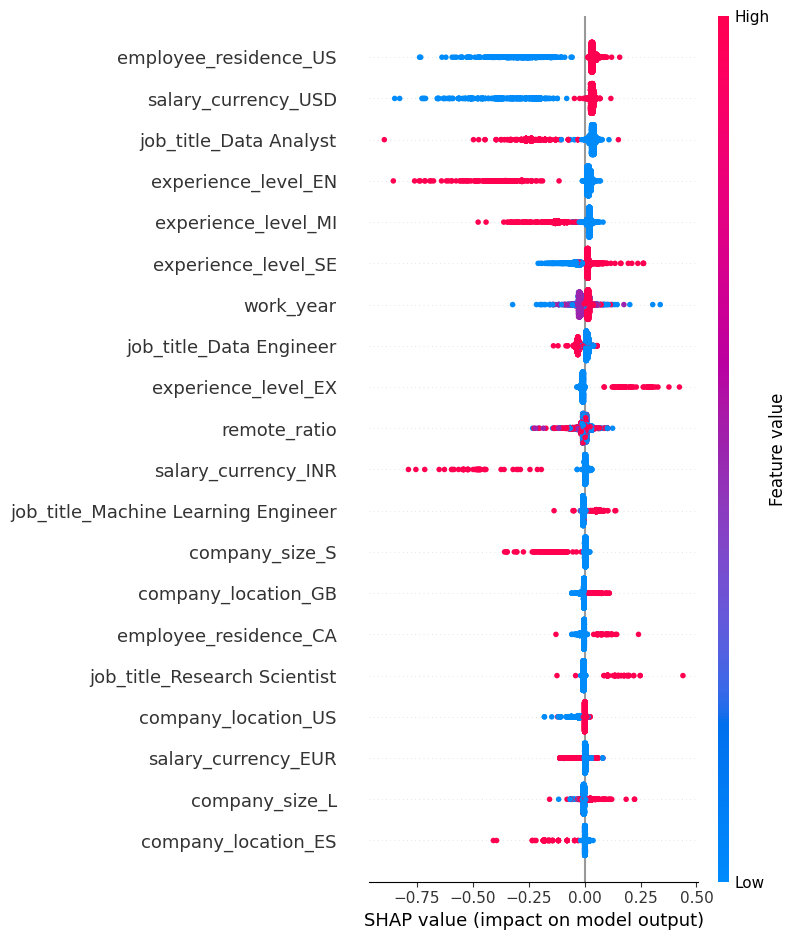

In [41]:
explainer = shap.Explainer(xgb)
shap_values = explainer(X_ohe)
shap.summary_plot(shap_values, X_ohe)

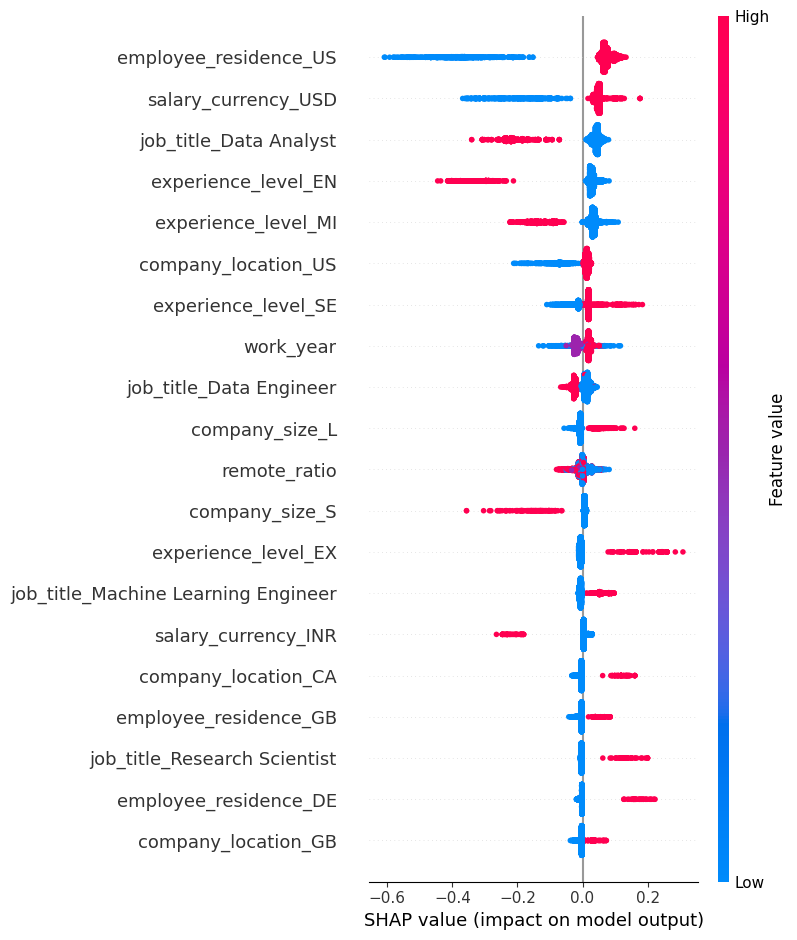

In [42]:
explainer = shap.Explainer(gbm)
shap_values = explainer(X_ohe)
shap.summary_plot(shap_values, X_ohe)

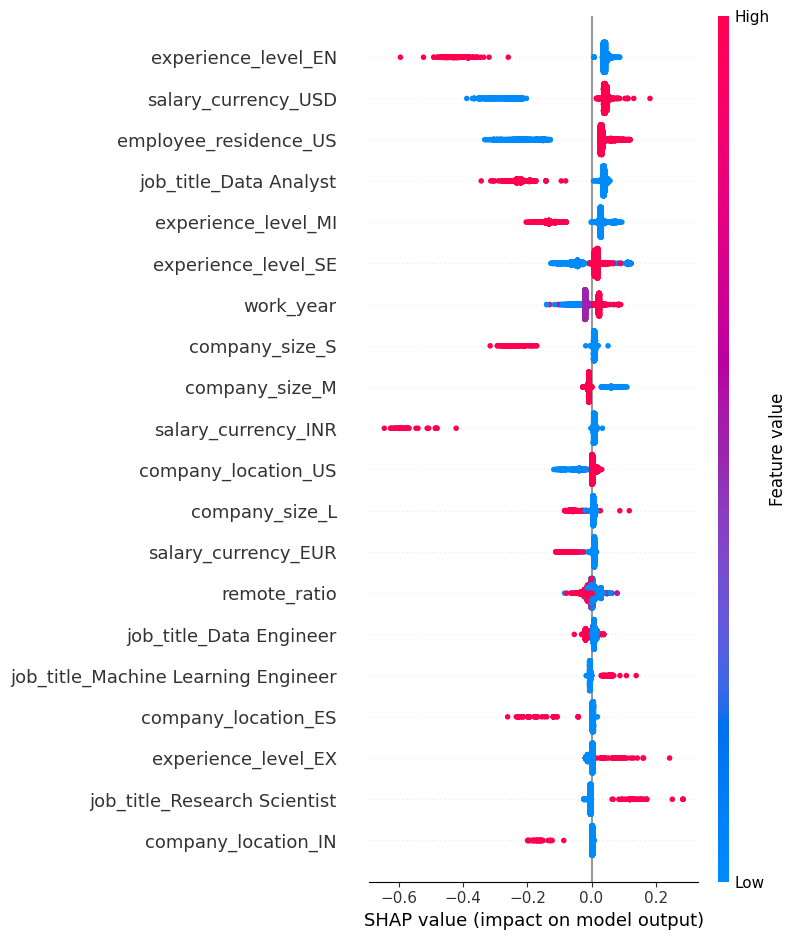

In [43]:
explainer = shap.Explainer(cat)
shap_values = explainer(X_ohe)
shap.summary_plot(shap_values, X_ohe)

–ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω–æ –Ω–∞ –∑–∞—Ä–ø–ª–∞—Ç—É –≤–ª–∏—è–µ—Ç –Ω–∞—Ö–æ–∂–¥–µ–Ω–∏–µ —Ä–∞–±–æ—Ç–Ω–∏–∫–∞ –≤ US, –æ–ø—ã—Ç SE –∏–ª–∏ EX, –¥–æ–ª–∂–Ω–æ—Å—Ç—å Research Scientist, –ø—Ä–∏ —ç—Ç–æ–º –±–æ–ª—å—à–æ–π —Ä–∞–∑–º–µ—Ä –∫–æ–º–ø–∞–Ω–∏–∏, –¥–æ–ª—è —Ä–∞–±–æ—Ç—ã —É–¥–∞–ª—ë–Ω–Ω–æ –Ω–µ–æ–¥–Ω–æ–∑–Ω–∞—á–Ω–æ –≤–ª–∏—è—é—Ç –Ω–∞ –∑–∞—Ä–ø–ª–∞—Ç—É

## –ó–∞–¥–∞–Ω–∏–µ 7 (2 –±–∞–ª–ª–∞)
–ü—Ä–∏–¥—É–º–∞–π—Ç–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –¥–ª—è —É–ª—É—á—à–µ–Ω–∏—è –∫–∞—á–µ—Å—Ç–≤–∞ –º–æ–¥–µ–ª–µ–π –Ω–∞ –æ—Å–Ω–æ–≤–µ –ø—Ä–µ–¥—ã–¥—É—â–µ–≥–æ –ø—É–Ω–∫—Ç–∞. –ö–∞–∫ –≤–∞–º –∫–∞–∂–µ—Ç—Å—è –∫–∞–∫–∏–º–∏ –ø—Ä–∏–∑–Ω–∞–∫–∞–º–∏ –º–æ–∂–Ω–æ —É–ª—É—á—à–∏—Ç—å –∫–∞—á–µ—Ç—Å–≤–æ –∫–∞–∂–¥–æ–π –º–æ–¥–µ–ª–∏? –†–µ–∞–ª–∏–∑—É–π—Ç–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –∏ –ø—Ä–æ–≤–µ—Ä—å—Ç–µ —É–ª—É—á—à–∏–ª–æ—Å—å –ª–∏ –∫–∞—á–µ—Å—Ç–≤–æ –º–æ–¥–µ–ª–µ–π. –ü–æ–ª–Ω—ã–π –±–∞–ª–ª –∑–∞ –∑–∞–¥–∞–Ω–∏–µ —Å—Ç–∞–≤–∏—Ç—Å—è –¥–∞–∂–µ –ø—Ä–∏ –æ—Ç—Å—É—Ç—Å—Ç–≤–∏–∏ —É–ª—É—á—à–µ–Ω–∏—è –∫–∞—á–µ—Å—Ç–≤–∞ –º–æ–¥–µ–ª–∏, –≤–∞–∂–Ω–æ –ø–æ–ø—Ä–æ–±–æ–≤–∞—Ç—å –ø—Ä–æ–≤–µ—Ä–∏—Ç—å —Å–≤–æ–∏ –≥–∏–ø–æ—Ç–µ–∑—ã –∏ —Å–¥–µ–ª–∞—Ç—å –≤—ã–≤–æ–¥—ã

In [44]:
pd.DataFrame.from_dict(d, orient='index', columns=["ohe", "le", "te"])["ohe"]

xgb    (0.38, 49318.38)
gbm     (0.4, 50480.47)
cat    (0.37, 49585.84)
Name: ohe, dtype: object

In [45]:
data = X_ohe.copy()
data_test = X_test_ohe.copy()
data["SE_in_US"] = data["experience_level_SE"] * data["employee_residence_US"]
data_test["SE_in_US"] = data_test["experience_level_SE"] * data_test["employee_residence_US"]

data["EX_in_US"] = data["experience_level_EX"] * data["employee_residence_US"]
data_test["EX_in_US"] = data_test["experience_level_EX"] * data_test["employee_residence_US"]

In [46]:
xgb = XGBRegressor(objective='reg:tweedie', random_state=42)
xgb.fit(data, y)
y_pred_xgb = xgb.predict(data_test)


gbm = lgb.LGBMRegressor(verbose=0, objective="poisson", random_state=42)
gbm.fit(data, y)
y_pred_gbm = gbm.predict(data_test)


cat = CatBoostRegressor(loss_function='Tweedie:variance_power=1.9', random_state=42)
cat.fit(data, y, verbose=False)
y_pred_cat = cat.predict(data_test)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines


In [47]:
print(f"MAPE: {round(mean_absolute_percentage_error(y_test, y_pred_xgb), 2)}, RMSE: {round(mean_squared_error(y_test, y_pred_xgb)**0.5, 2)}")
print(f"MAPE: {round(mean_absolute_percentage_error(y_test, y_pred_gbm), 2)}, RMSE: {round(mean_squared_error(y_test, y_pred_gbm)**0.5, 2)}")
print(f"MAPE: {round(mean_absolute_percentage_error(y_test, y_pred_cat), 2)}, RMSE: {round(mean_squared_error(y_test, y_pred_cat)**0.5, 2)}")

MAPE: 0.38, RMSE: 49665.05
MAPE: 0.4, RMSE: 50477.28
MAPE: 0.36, RMSE: 49569.77


–Ω–µ—Ç –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω—ã—Ö –∏–∑–º–µ–Ω–µ–Ω–∏–π

In [48]:
data = X_ohe.copy()
data_test = X_test_ohe.copy()
data["SE_in_US"] = data["experience_level_SE"] * data["employee_residence_US"] * data["company_size_M"]
data_test["SE_in_US"] = data_test["experience_level_SE"] * data_test["employee_residence_US"] * data["company_size_M"]

data["EX_in_US"] = data["experience_level_EX"] * data["employee_residence_US"] * data["company_size_M"]
data_test["EX_in_US"] = data_test["experience_level_EX"] * data_test["employee_residence_US"] * data["company_size_M"]

In [49]:
xgb = XGBRegressor(objective='reg:tweedie', random_state=42)
xgb.fit(data, y)
y_pred_xgb = xgb.predict(data_test)


gbm = lgb.LGBMRegressor(verbose=0, objective="poisson", random_state=42)
gbm.fit(data, y)
y_pred_gbm = gbm.predict(data_test)


cat = CatBoostRegressor(loss_function='Tweedie:variance_power=1.9', random_state=42)
cat.fit(data, y, verbose=False)
y_pred_cat = cat.predict(data_test)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines


In [50]:
print(f"MAPE: {round(mean_absolute_percentage_error(y_test, y_pred_xgb), 2)}, RMSE: {round(mean_squared_error(y_test, y_pred_xgb)**0.5, 2)}")
print(f"MAPE: {round(mean_absolute_percentage_error(y_test, y_pred_gbm), 2)}, RMSE: {round(mean_squared_error(y_test, y_pred_gbm)**0.5, 2)}")
print(f"MAPE: {round(mean_absolute_percentage_error(y_test, y_pred_cat), 2)}, RMSE: {round(mean_squared_error(y_test, y_pred_cat)**0.5, 2)}")

MAPE: 0.38, RMSE: 49296.56
MAPE: 0.4, RMSE: 50543.93
MAPE: 0.37, RMSE: 50433.62


–Ω–∞ XGBOOST –ø–æ–≤—ã—Å–∏–ª–æ—Å—å –Ω–µ–∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ –∫–∞—á–µ—Å—Ç–≤–æ

In [51]:
data["foreigner"] = df["employee_residence"] != df["company_location"] 
data_test["foreigner"] = df["employee_residence"] != df["company_location"]

In [52]:
xgb = XGBRegressor(objective='reg:tweedie', random_state=42)
xgb.fit(data, y)
y_pred_xgb = xgb.predict(data_test)


gbm = lgb.LGBMRegressor(verbose=0, objective="poisson", random_state=42)
gbm.fit(data, y)
y_pred_gbm = gbm.predict(data_test)


cat = CatBoostRegressor(loss_function='Tweedie:variance_power=1.9', random_state=42)
cat.fit(data, y, verbose=False)
y_pred_cat = cat.predict(data_test)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines


In [53]:
print(f"MAPE: {round(mean_absolute_percentage_error(y_test, y_pred_xgb), 2)}, RMSE: {round(mean_squared_error(y_test, y_pred_xgb)**0.5, 2)}")
print(f"MAPE: {round(mean_absolute_percentage_error(y_test, y_pred_gbm), 2)}, RMSE: {round(mean_squared_error(y_test, y_pred_gbm)**0.5, 2)}")
print(f"MAPE: {round(mean_absolute_percentage_error(y_test, y_pred_cat), 2)}, RMSE: {round(mean_squared_error(y_test, y_pred_cat)**0.5, 2)}")

MAPE: 0.38, RMSE: 49675.55
MAPE: 0.4, RMSE: 50622.02
MAPE: 0.37, RMSE: 49938.56


–¥–æ–±–∞–≤–ª–µ–Ω–∏–µ –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–∏ –æ —Ç–æ–º, –∏–Ω–æ—Å—Ç—Ä–∞–Ω–µ—Ü –ª–∏ —Å–æ—Ç—Ä—É–¥–Ω–∏–∫, —Ç–æ–ª—å–∫–æ –ø–æ–Ω–∏–∑–∏–ª–æ –∫–∞—á–µ—Å—Ç–≤–æ

## –ó–∞–¥–∞–Ω–∏–µ 8 (3 –±–∞–ª–ª–∞)
–ù–∞–ø–∏—à–∏—Ç–µ —Ñ—É–Ω–∫—Ü–∏—é –¥–ª—è –æ–ø—Ç–∏–º–∏–∑–∞—Ü–∏–∏ –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ —Ç—Ä—ë—Ö –º–æ–¥–µ–ª–µ–π –±—É—Å—Ç–∏–Ω–≥–∞: xgboost, catboost –∏ lightgbm. –§—É–Ω–∫—Ü–∏—è –¥–æ–ª–∂–Ω–∞ —Ä–∞–±–æ—Ç–∞—Ç—å –º–∞–∫—Å–∏–º–∞–ª—å–Ω–æ —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω–æ –ø–æ –≤—Ä–µ–º–µ–Ω–∏ –∏ –∫–∞—á–µ—Å—Ç–≤—É (—Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–µ–Ω–Ω–æ, –ø–æ–ª–Ω—ã–π –ø–µ—Ä–µ–±–æ—Ä - —Å–∞–º—ã–π —Ç—É–ø–æ–π –≤–∞—Ä–∏–∞–Ω—Ç)

–í —Å–ª—É—á–∞–µ Catboost, –∏—Å–ø–æ–ª—å–∑—É–π—Ç–µ pool –¥–ª—è –ø–µ—Ä–µ–¥–∞—á–∏ –¥–∞–Ω–Ω—ã—Ö –≤ –º–æ–¥–µ–ª—å —Å —É–∫–∞–∑–∞–Ω–∏–µ–º –∫–∞–∫–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ, –∞ –∫–∞–∫–∏–µ –Ω–µ—Ç —Å –ø–æ–º–æ—â—å—é –ø–∞—Ä–∞–º–µ—Ç—Ä—ã cat_features.

–ü–æ–¥–±–µ—Ä–∏—Ç–µ –¥–ª—è –∫–∞–∂–¥–æ–π –∏–∑ –º–æ–¥–µ–ª–µ–π –ª—É—á—à–∏–µ –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä—ã. 

**–ø–æ –∞–ª–≥–æ—Ä–∏—Ç–º—É –∏–∑ —Å–µ–º–∏–Ω–∞—Ä–∞:**

–í—ã–±–∏—Ä–∞–µ–º –æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–æ –±–æ–ª—å—à—É—é learning_rate ( ùúÇ‚àà[0.05,0.3]
 ), –ø–æ–¥–±–∏—Ä–∞–µ–º –æ–ø—Ç–∏–º–∞–ª—å–Ω–æ–µ —á–∏—Å–ª–æ –¥–µ—Ä–µ–≤—å–µ–≤ –¥–ª—è –≤—ã–±—Ä–∞–Ω–Ω–æ–≥–æ  ùúÇ
 
–ù–∞—Å—Ç—Ä–∞–∏–≤–∞–µ–º –ø–∞—Ä–∞–º–µ—Ç—Ä—ã –¥–µ—Ä–µ–≤—å–µ–≤, –Ω–∞—á–∏–Ω–∞—è —Å —Å–∞–º—ã—Ö –∑–Ω–∞—á–∏–º—ã—Ö 

–£–º–µ–Ω—å—à–∞–µ–º learning_rate, –ø—Ä–æ–ø–æ—Ä—Ü–∏–æ–Ω–∞–ª—å–Ω–æ —É–≤–µ–ª–∏—á–∏–≤–∞–µ–º —á–∏—Å–ª–æ –¥–µ—Ä–µ–≤—å–µ–≤

**—Ñ—É–Ω–∫—Ü–∏—è —Ç–æ–∂–µ –Ω–∞ –æ—Å–Ω–æ–≤–µ —Ñ—É–Ω–∫—Ü–∏–∏ modelfit –∏–∑ —Å–µ–º–∏–Ω–∞—Ä–∞**

In [54]:
def xgb_params(model, X_train, y_train):
        xgtrain = xgboost.DMatrix(X_train.values, label=y_train.values)
        cvresult = xgboost.cv(
            model.get_xgb_params(),
            xgtrain,
            num_boost_round=model.get_params()["n_estimators"],
            nfold=5,
            metrics="rmse",
            early_stopping_rounds=50
        )
        model.set_params(n_estimators=cvresult.shape[0])
        
        params = {"max_depth": range(2, 10)}
        gs  = GridSearchCV(
        estimator=model, param_grid=params, scoring="neg_root_mean_squared_error", n_jobs=-1, cv=5)

        gs.fit(X_train, y_train)

        model.set_params(max_depth=gs.best_params_["max_depth"])
        
        params = {"subsample": np.arange(0.1, 1, 0.1)}
        gs  = GridSearchCV(
        estimator=model, param_grid=params, scoring="neg_root_mean_squared_error", n_jobs=-1, cv=5)

        gs.fit(X_train, y_train)

        model.set_params(subsample=gs.best_params_["subsample"])
        
        params = {"reg_lambda": [0.1, 1, 10, 100]}
        gs  = GridSearchCV(
        estimator=model, param_grid=params, scoring="neg_root_mean_squared_error", n_jobs=-1, cv=5)

        gs.fit(X_train, y_train)

        model.set_params(reg_lambda=gs.best_params_["reg_lambda"])

In [55]:
xgb = XGBRegressor(
    learning_rate=0.3,
    n_estimators=150,
    objective='reg:tweedie',
    random_state=42,
    nthread=-1)
xgb_params(xgb, X_ohe, y)

In [56]:
xgb.set_params(learning_rate=0.003, n_estimators=xgb.get_params()["n_estimators"]*100)
print(xgb.get_params())
xgb.fit(X_ohe, y)
y_pred_xgb = xgb.predict(X_test_ohe)

print(f"MAPE: {round(mean_absolute_percentage_error(y_test, y_pred_xgb), 2)}, RMSE: {round(mean_squared_error(y_test, y_pred_xgb)**0.5, 2)}")

{'objective': 'reg:tweedie', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.003, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 5, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': 4800, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': 42, 'reg_alpha': None, 'reg_lambda': 1, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': 0.6, 'tree_method': None, 'validate_parameters': None, 'verbosity': None, 'nthread': -1}
MAPE: 0.38, RMSE: 49714.81


In [57]:
cat = ["experience_level", "employment_type", "job_title", "salary_currency", "employee_residence", 
                        "company_location", "company_size"]
catmod = CatBoostRegressor(loss_function='Tweedie:variance_power=1.9', cat_features=cat, random_state=42)
catmod.fit(X, y, verbose=False)
y_pred_cat = catmod.predict(X_test)

In [58]:
print(f"MAPE: {round(mean_absolute_percentage_error(y_test, y_pred_cat), 2)}, RMSE: {round(mean_squared_error(y_test, y_pred_cat)**0.5, 2)}")

MAPE: 0.4, RMSE: 50562.55


## –ó–∞–¥–∞–Ω–∏–µ 9 (1 –±–∞–ª–ª)

–°–¥–µ–ª–∞–π—Ç–µ –≤—ã–≤–æ–¥—ã –ø—Ä–æ –º–æ–¥–µ–ª–∏ –±—É—Å—Ç–∏–Ω–≥–∞, –∫–∞–∫–∞—è –∏–∑ –º–æ–¥–µ–ª–µ–π –ø–æ–∫–∞–∑–∞–ª–∞ –ª—É—á—à–∏–π —Ä–µ–∑—É–ª—å—Ç–∞—Ç –ø–æ –∫–∞—á–µ—Å—Ç–≤—É, —Å–∫–æ—Ä–æ—Å—Ç–∏ –æ–±—É—á–µ–Ω–∏—è –∏ —Å–∫–æ—Ä–æ—Å—Ç–∏ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è

–≤—Å–µ –º–æ–¥–µ–ª–∏ –±–µ–∑ –Ω–∞—Å—Ç—Ä–æ–π–∫–∏ —Å–ø—Ä–∞–≤–ª—è—é—Ç—Å—è c –ø—Ä–∏–º–µ—Ä–Ω–æ –æ–¥–∏–Ω–∞–∫–æ–≤—ã–º –∫–∞—á–µ—Å—Ç–≤–æ–º, —Å–∞–º–∞—è –±—ã—Å—Ç—Ä–∞—è –º–æ–¥–µ–ª—å -- LightGBM, CatBoost —Ä–∞–±–æ—Ç–∞–µ—Ç –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ –¥–æ–ª—å—à–µ, –≤—Å–µ –º–æ–¥–µ–ª–∏ —Ç—Ä–µ–±—É—é—Ç –∞–∫–∫—É—Ä–∞—Ç–Ω–æ–≥–æ –ø–æ–¥–±–æ—Ä–∞ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤, CatBoost —É–¥–æ–±–µ–Ω —Ç–µ–º, —á—Ç–æ –º–æ–∂–Ω–æ –Ω–µ –∫–æ–¥–∏—Ä–æ–≤–∞—Ç—å –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–µ